Now that we have the differentiable forward solver fixed, we can implement the BIC. Before we actually implement it, let's study an old run and plot the BIC for that one.

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import jax.numpy as jnp
import numpy as np
from deepymod.analysis import load_tensorboard
from natsort import natsorted

In [2]:
df = load_tensorboard("../differentiable_fwd_solver/runs/sbl_run_0/")

In [122]:
alpha_threshold = 1e4
n_samples = 1000

In [123]:
# Getting number of active samples
alpha_keys = natsorted([key for key in df.keys() if key.find('alpha') == 0])
n_active = (df[alpha_keys] < alpha_threshold).sum(axis=1)

In [139]:
# Getting likelihood
L = -n_samples  / 2 * (df.tau * df.mse - np.log(df.tau) + df.beta * df.reg - np.log(df.beta))
#L = -n_samples  / 2 * (df.beta * df.reg - np.log(df.beta) + np.log(2 * jnp.pi))

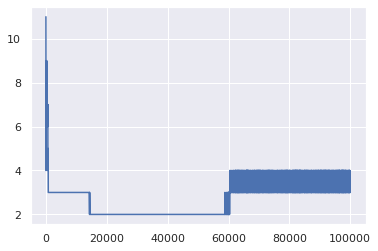

In [125]:
plt.plot(n_active)


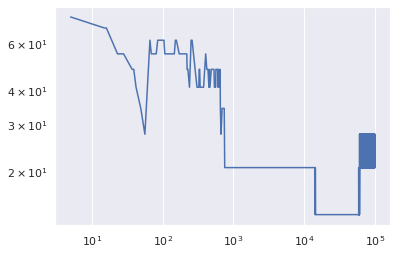

In [126]:
plt.loglog(n_active * np.log(n_samples))

In [135]:
BIC = n_active * np.log(n_samples) + 2 * df.loss

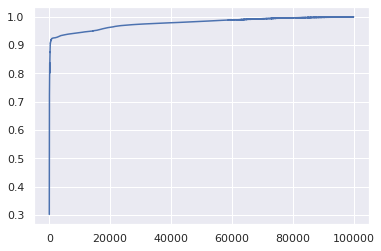

In [138]:
plt.plot(BIC / np.min(BIC))

In [64]:
np.argmin(BIC)

9997

In [105]:
n_samples * np.log(df.reg)  

5       -5504.903925
15      -6192.927959
16      -6300.743786
23      -7204.807055
28      -6262.752892
            ...     
99966   -9133.658954
99968   -9128.973486
99987   -9161.349350
99991   -9128.560196
99999   -9144.268121
Name: reg, Length: 10000, dtype: float64

In [95]:
np.log(df.reg)

5       -5.504904
15      -6.192928
16      -6.300744
23      -7.204807
28      -6.262753
           ...   
99966   -9.133659
99968   -9.128973
99987   -9.161349
99991   -9.128560
99999   -9.144268
Name: reg, Length: 10000, dtype: float64

In [88]:
n_samples / np.log(n_samples)

144.76482730108395

In [89]:
np.log(df.mse)

5       -2.657349
15      -3.383364
16      -3.304198
23      -3.241559
28      -3.631298
           ...   
99966   -4.945239
99968   -4.945219
99987   -4.945224
99991   -4.945207
99999   -4.945242
Name: mse, Length: 10000, dtype: float64